# 📊 Customer Churn Analysis – Telco Dataset

**Objective:** Analyze customer behavior and identify key churn drivers using Python-based EDA.


In [1]:
#Import Libraies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\data\cleaned_telco_churn_data.csv")

## Load and Preview Data

Let's load the Telco Customer Churn dataset and examine its structure.


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### 1. Churn Distribution

This chart shows the count of customers who have churned vs those who have not. It provides a baseline understanding of churn rate within the dataset.


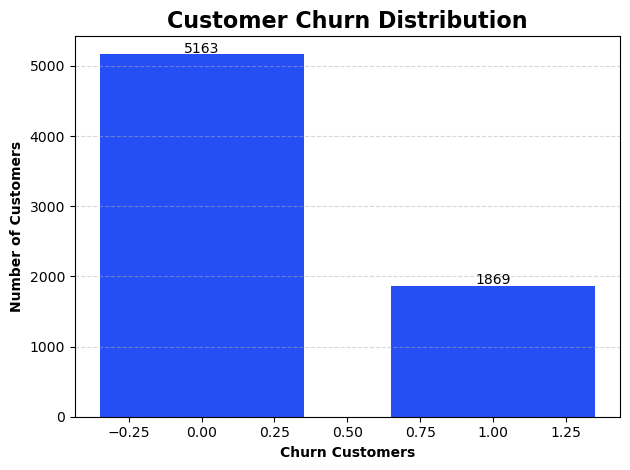

In [61]:
sns.countplot(x=df['Churn'],width = 0.7,native_scale=True,facecolor = '#254ef5')
plt.xlabel("Churn Customers",fontsize = 10,fontweight = 'bold')
plt.ylabel("Number of Customers",fontsize = 10,fontweight = 'bold')
plt.grid(axis = 'y',linestyle = "--",alpha = 0.5)
plt.title("Customer Churn Distribution",fontsize = 16,fontweight = 'bold')
for i,v in enumerate(df['Churn'].value_counts()):
    plt.text(i,v+20,str(v),ha = 'center')
plt.tight_layout()
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\churn_customer_distribution.png",dpi=300,bbox_inches='tight',)
plt.show()

### 2. Tenure Distribution

Most customers have shorter tenures, indicating a higher churn risk in the early months of service.


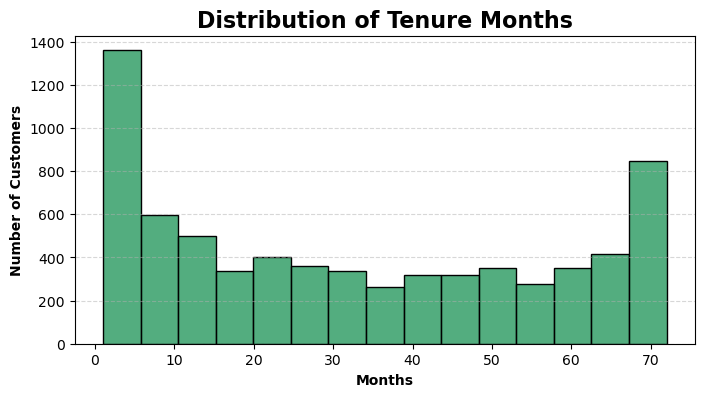

In [63]:
plt.figure(figsize = (8,4))
sns.histplot(df['tenure'],linewidth = 1,color = '#1a9254')
plt.xlabel("Months",fontsize = 10,fontweight = 'bold')
plt.ylabel("Number of Customers",fontsize = 10,fontweight = 'bold')
plt.title("Distribution of Tenure Months",fontsize = 16,fontweight = 'bold')
plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\customers_tenure_distribution.png",dpi=300,bbox_inches='tight',)
plt.show()

### 3. Distribution of Monthly Charges  
Shows how monthly charges are distributed among all customers, helping identify common pricing tiers and potential outliers.


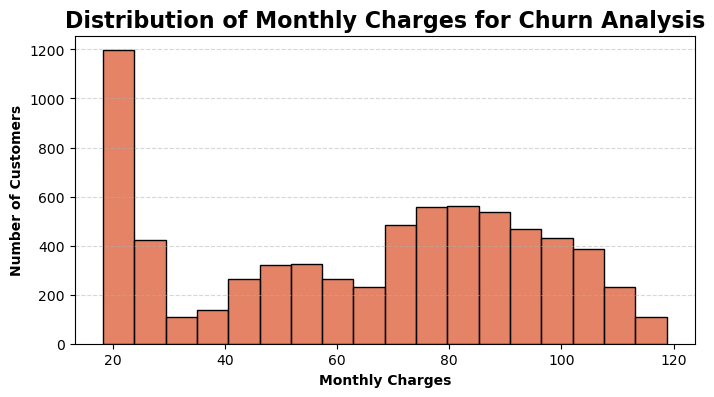

In [65]:
plt.figure(figsize = (8,4))
sns.histplot(df['MonthlyCharges'],linewidth = 1,color = '#dc5932')
plt.xlabel("Monthly Charges",fontsize = 10,fontweight = 'bold')
plt.ylabel("Number of Customers",fontsize = 10,fontweight = 'bold')
plt.title("Distribution of Monthly Charges for Churn Analysis",fontsize = 16,fontweight = 'bold')
plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\monthly_charges_distribution.png",dpi=300,bbox_inches='tight',)
plt.show()

### 4. Internet Service Type Distribution  
Highlights the proportion of users subscribed to DSL, Fiber Optic, or no internet service—crucial for segment-based churn analysis.


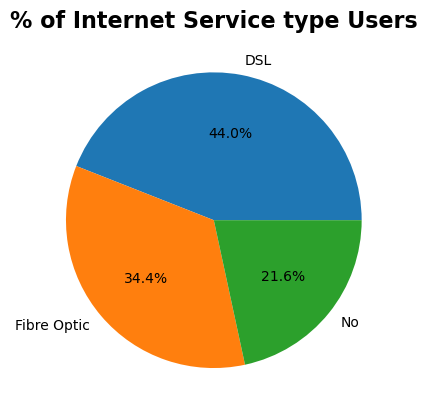

In [31]:
a = df['InternetService'].value_counts()
plt.pie(a,labels = ['DSL','Fibre Optic','No'],autopct='%1.1f%%',labeldistance=1.1)
plt.title("% of Internet Service type Users",fontsize = 16,fontweight = 'bold')
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\internet_service_distribution.png",dpi=300,bbox_inches='tight',)
plt.show()

### 5. Monthly Charges vs Churn

A box plot comparing the distribution of monthly charges for churned vs non-churned customers. This helps identify if high bills influence churn.


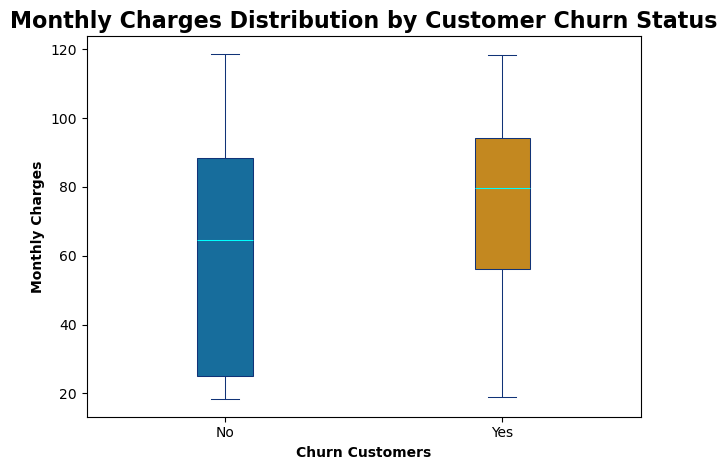

In [35]:
sns.boxplot(y = df['MonthlyCharges'],x = df['Churn'],orient = 'v',palette = 'colorblind',hue = df['Churn'], legend = False,whis=(0, 100),color = '0.5',width = 0.2,linecolor = '#137',fliersize = 1,medianprops=dict(color="cyan"),linewidth=.75)
plt.xlabel("Churn Customers",fontsize = 10,fontweight = 'bold')
plt.ylabel("Monthly Charges",fontsize = 10,fontweight = 'bold')
plt.title("Monthly Charges Distribution by Customer Churn Status",fontsize = 16,fontweight = 'bold')
plt.tight_layout()
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\monthly_charges_by_churn_boxplot.png",dpi=300,bbox_inches='tight')
plt.show()

### 6. Tenure vs Churn

A box plot showing customer tenure grouped by churn. Shorter tenure among churned customers may signal early dissatisfaction.


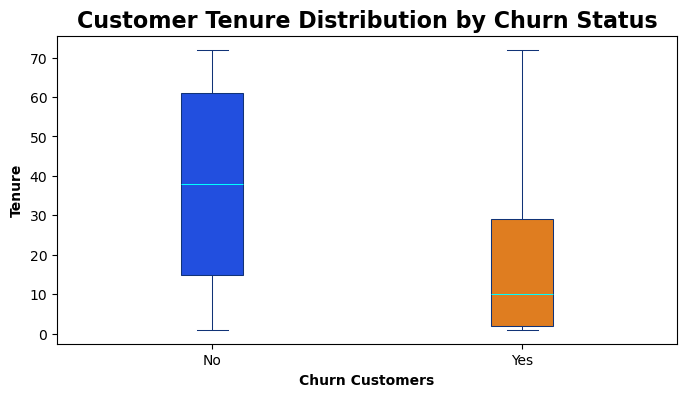

In [43]:
plt.figure(figsize = (8,4))

sns.boxplot(y = df['tenure'],x = df['Churn'],orient = 'v',palette = 'bright',hue = df['Churn'], legend = False,whis=(0, 100),color = '0.8',width = 0.2,linecolor = '#137',fliersize = 1,medianprops=dict(color="cyan"),linewidth=.75)
plt.xlabel("Churn Customers",fontsize = 10,fontweight = 'bold')
plt.ylabel("Tenure",fontsize = 10,fontweight = 'bold')
plt.title("Customer Tenure Distribution by Churn Status",fontsize = 16,fontweight = 'bold')
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\tenure_by_churn_boxplot.png",dpi=300,bbox_inches='tight',)
plt.show()

### 7. Contract Type vs Churn

This chart shows how contract length relates to churn. Customers with month-to-month contracts may churn more frequently.


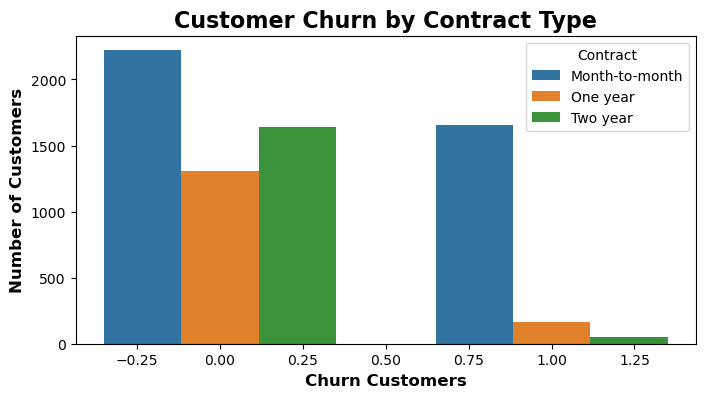

In [67]:
plt.figure(figsize = (8,4))

sns.countplot(x=df['Churn'],hue = df['Contract'],width = 0.7,native_scale=True)
plt.xlabel("Churn Customers",fontsize = 12,fontweight = 'bold')
plt.ylabel("Number of Customers",fontsize = 12,fontweight = 'bold')
plt.title("Customer Churn by Contract Type",fontsize = 16,fontweight = 'bold')
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\contract_vs_churn_countplot.png",dpi=300,bbox_inches='tight',)
plt.show()

### 8. Payment Method vs Churn

A count plot comparing different payment methods and their churn rates. Auto-payment methods may reduce churn due to convenience.


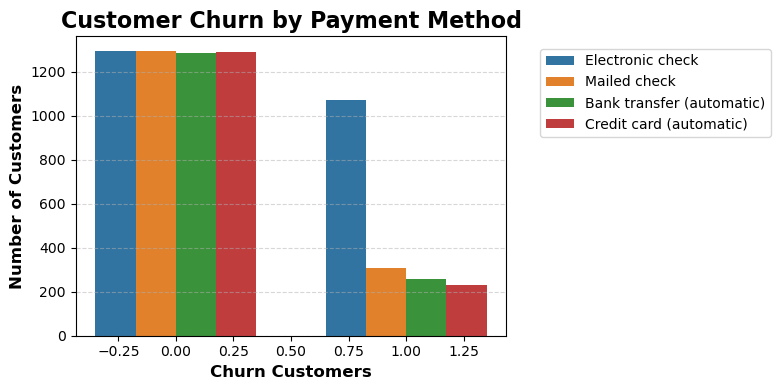

In [69]:
plt.figure(figsize = (8,4))
sns.countplot(x=df['Churn'],hue = df['PaymentMethod'],width = 0.7,native_scale=True)
plt.xlabel("Churn Customers",fontsize = 12,fontweight = 'bold')
plt.ylabel("Number of Customers",fontsize = 12,fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.9)
plt.title("Customer Churn by Payment Method",fontsize = 16,fontweight = 'bold')
plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
plt.tight_layout()
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\payment_method_vs_churn_countplot.png",dpi=300,bbox_inches='tight',)
plt.show()

### 9. Average Total Charges by Churn

Churned customers have **lower average Total Charges**, indicating they likely left early in their lifecycle.


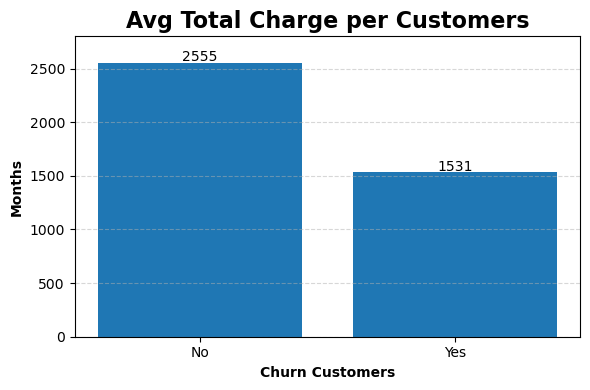

In [49]:
a = df.groupby('Churn')['TotalCharges'].mean()

plt.figure(figsize = (6,4),facecolor = 'white')
plt.bar(a.index,a.values)
plt.title("Avg Total Charge per Customers",fontsize = 16,fontweight = 'bold')
plt.xlabel("Churn Customers",fontsize = 10,fontweight = 'bold')
plt.ylabel("Months",fontsize = 10,fontweight = 'bold')
plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
plt.ylim(0,2800)
for x,y in enumerate(a.values):
    plt.text(x,y+12,int(y),ha = 'center')
plt.tight_layout()
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\avg_total_charges_per_churn_barplot.png",dpi=300,bbox_inches='tight',)
plt.show()

### 10. Senior Citizens vs Churn

This plot investigates whether older customers are more likely to churn. Can provide age-related insights for retention.


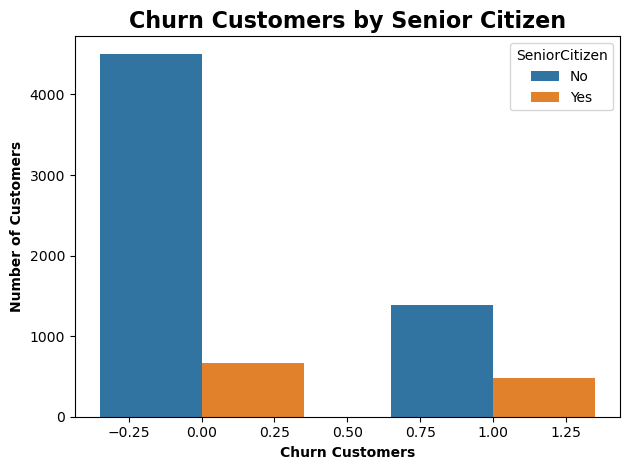

In [71]:
sns.countplot(x=df['Churn'],hue = df['SeniorCitizen'],width = 0.7,native_scale=True)
plt.xlabel("Churn Customers",fontsize = 10,fontweight = 'bold')
plt.ylabel("Number of Customers",fontsize = 10,fontweight = 'bold')
plt.title("Churn Customers by Senior Citizen",fontsize = 16,fontweight = 'bold')
plt.tight_layout()
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\senior_citizen_vs_churn_countplot.png",dpi=300,bbox_inches='tight',)
plt.show()

### 11. Churn Rate Heatmap (Monthly Charges vs Tenure)

This heatmap visualizes the average churn rate across binned monthly charges and tenure segments. It reveals high-risk customer zones.


C:\Users\Aman Puniya\AppData\Local\Temp\ipykernel_2464\1586362093.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_matrix = df.pivot_table(


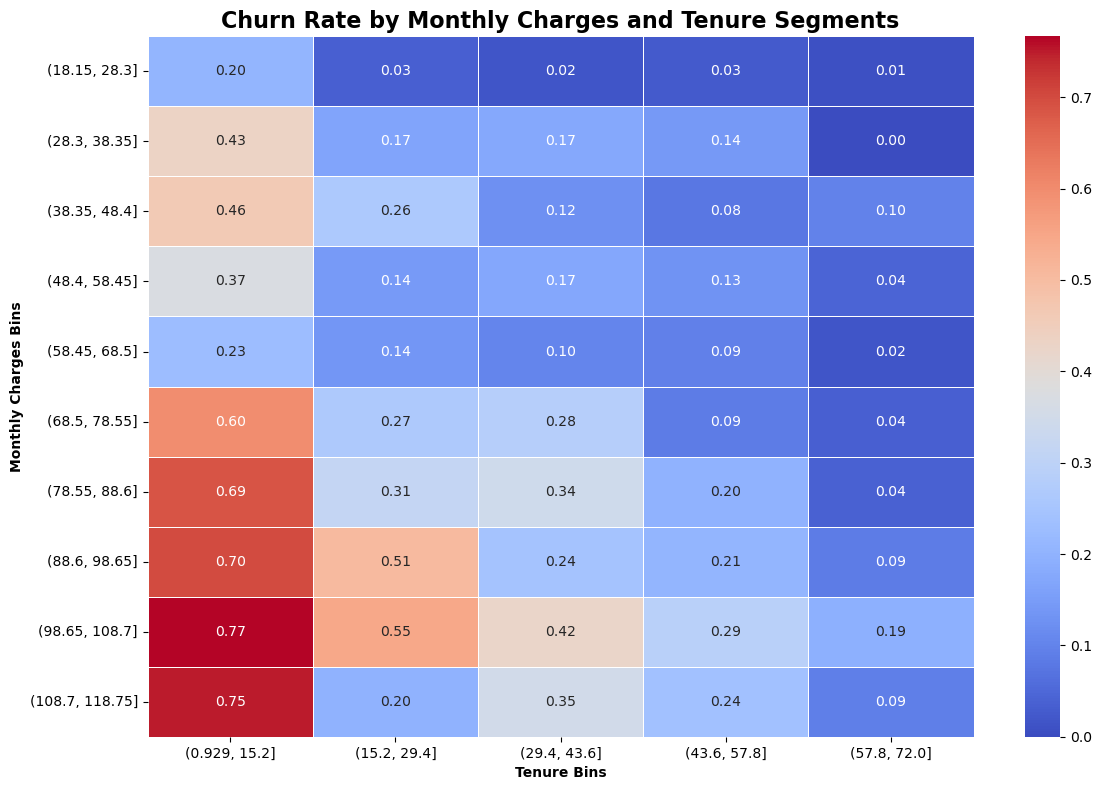

In [53]:
# Convert 'Churn' column to binary numeric values if not already done
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Bin MonthlyCharges and tenure
monthly_bins = pd.cut(df['MonthlyCharges'], bins=10)
tenure_bins = pd.cut(df['tenure'], bins=5)

# Pivot: Calculate average churn rate for each combination of bins
heatmap_matrix = df.pivot_table(
    index=monthly_bins,
    columns=tenure_bins,
    values='Churn',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix,
    cmap='coolwarm',
    fmt='.2f',
    annot=True,
    linewidths=0.5
)

plt.title('Churn Rate by Monthly Charges and Tenure Segments', fontsize=16, fontweight='bold')
plt.xlabel('Tenure Bins', fontsize=10, fontweight='bold')
plt.ylabel('Monthly Charges Bins', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\churn_rate_heatmap_monthlycharges_tenure.png",dpi=300,bbox_inches='tight',)
plt.show()

### 12. Online Security vs Churn by Internet Type  
Shows how churn varies with Online Security availability across different Internet services—reveals churn sensitivity based on service protection.


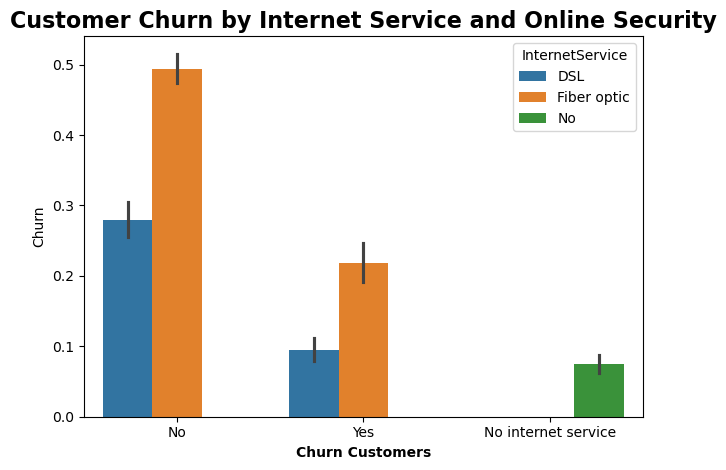

In [59]:
sns.barplot(x = 'OnlineSecurity',y = 'Churn',hue = 'InternetService',data = df)
plt.xlabel("Online Security",fontsize = 10,fontweight = 'bold')
plt.xlabel("Churn Customers",fontsize = 10,fontweight = 'bold')
plt.title("Customer Churn by Internet Service and Online Security",fontsize = 16,fontweight = 'bold')
plt.tight_layout()
plt.savefig(r"C:\Users\Aman Puniya\Customer-Churn-Analysis-Telecom\visualizations\plots\online_security_vs_churn_by_internet_service.png",dpi=300,bbox_inches='tight',)
plt.show()